## Progama Universidade para Todos?


O acesso à Educação Superior no Brasil é um tema em que o governo, principalmente o MEC, Ministério da Educação, busca sempre expandir, tornando-o cada vez mais acessível a população. <br> 

Medidas como reserva de vagas em Universidades Públicas para Negros, Indígenas e estudantes egressos da escola são provas da busca por democratizar o acesso ao diploma de graduação. <br> 

Outro programa do governo federal quem tem esse intuito é o ProUni, Programa Universidade Para Todos, criado em 2004 pelo então Ministro da Educação, Fernando Haddad. <br> 

O próprio [site do ProUni]( https://acessounico.mec.gov.br/prouni) o define como um programa de ”(...)oferta bolsas de estudo, integrais e parciais (50% do valor da mensalidade do curso), em cursos de graduação e sequenciais de formação específica, em instituições de educação superior privadas. O público-alvo do programa é o estudante sem diploma de nível superior.”<br> 

Para poder participar do programa o candidato deve, além de outros critérios, comprovar renda familiar bruta mensal, por pessoa, de até 1,5 salários mínimos, para as bolsas integrais ou renda bruta mensal, por pessoa, de até 3 salários mínimos para as bolsas parciais. 
<br><br>
<center><strong><h3>Mas será que o ProUni é REALMENTE para todos?</h3></strong></center>

para explorar melhor essa questão iremos pecorrer algumas etapas, buscando entender o que os dados podem nos dizer sobre isso. 

## 1. Definição do Problema

Primeiramente, deixaremos claro que o presente projeto não busca, em nenhum momento, descredibilizar a importância do ProUni para muitas pessoas. O programa realmente é responsável por acesso a educação superior de muitos brasileiros. <br>

O projeto busca analisar a forma como as bolsas são distribuidas em diferentes aspectos como gênero, raça e regiões do país. Dessa forma, buscamos identificar se o ProUni realmente democratiza o acesso as universidades para os Brasileiros. Como essas bolsas são distribuidas pelo Brasil. <br>

Iremos então comparar os dados do próprio ProUni com os dados do senso do IBGE para essas análises

## 2. Obtenção dos Dados

1. Iremos utilizar os dados disponíveis no [site](https://dadosabertos.mec.gov.br/prouni) de dados do MEC sobre o ProUni. Para essa análise, utilizaremos os 4 últimos anos disponíveis (2017 a 2020).

2. Comparativamente utilizaremos os dados do IBGE (sempre em porcentagem). Sempre que forem utilizados, será descrito a fonte do mesmo. 

In [8]:
#Bibliotecas utilizadas no tratamento de dados
import pandas as pd
from unidecode import unidecode
import re

In [9]:
df_2020 = pd.read_csv('Dados/ProuniRelatorioDadosAbertos2020.csv',sep= ';',encoding='latin-1')
df_2019 = pd.read_csv('Dados/pda-prouni-2019.csv',sep= ';',encoding='utf-8')
df_2018 = pd.read_csv('Dados/pda-prouni-2018.csv',sep= ';',encoding='utf-8')
df_2017 = pd.read_csv('Dados/pda-prouni-2017.csv',sep= ';',encoding='utf-8')


## 3. Exploração e Preparação dos Dados

Nesta etapa analisaremos os 4 arquivos selecionados para podermos qualificar esses dados.

Copio aqui, o link da documentação do Próprio site do MEC em que consta o dicionário dos dados para a nossa melhor compreensão:
<https://dadosabertos.mec.gov.br/images/pdf/dicionario-prouni-20161222.pdf>


In [10]:
# Analise das colunas de cada dataframe para que seja possível a unificação
columns_2020 = df_2020.columns
columns_2019 = df_2019.columns
columns_2018 = df_2018.columns
columns_2017 = df_2017.columns
lista_colunas = [
    ("2017", columns_2017),
    ("2018", columns_2018),
    ("2019", columns_2019),
    ("2020", columns_2020)
]
for ano, colunas in lista_colunas:
    print(f"Colunas para o ano {ano}:")
    for coluna in colunas:
        print(f"- {coluna}")
    print()


Colunas para o ano 2017:
- ANO_CONCESSAO_BOLSA
- CODIGO_EMEC_IES_BOLSA
- NOME_IES_BOLSA
- TIPO_BOLSA
- MODALIDADE_ENSINO_BOLSA
- NOME_CURSO_BOLSA
- NOME_TURNO_CURSO_BOLSA
- CPF_BENEFICIARIO_BOLSA
- SEXO_BENEFICIARIO_BOLSA
- RACA_BENEFICIARIO_BOLSA
- DT_NASCIMENTO_BENEFICIARIO
- BENEFICIARIO_DEFICIENTE_FISICO
- REGIAO_BENEFICIARIO_BOLSA
- SIGLA_UF_BENEFICIARIO_BOLSA
- MUNICIPIO_BENEFICIARIO_BOLSA

Colunas para o ano 2018:
- ANO_CONCESSAO_BOLSA
- CODIGO_EMEC_IES_BOLSA
- NOME_IES_BOLSA
- TIPO_BOLSA
- MODALIDADE_ENSINO_BOLSA
- NOME_CURSO_BOLSA
- NOME_TURNO_CURSO_BOLSA
- CPF_BENEFICIARIO_BOLSA
- SEXO_BENEFICIARIO_BOLSA
- RACA_BENEFICIARIO_BOLSA
- DT_NASCIMENTO_BENEFICIARIO
- BENEFICIARIO_DEFICIENTE_FISICO
- REGIAO_BENEFICIARIO_BOLSA
- SIGLA_UF_BENEFICIARIO_BOLSA
- MUNICIPIO_BENEFICIARIO_BOLSA

Colunas para o ano 2019:
- ANO_CONCESSAO_BOLSA
- CODIGO_EMEC_IES_BOLSA
- NOME_IES_BOLSA
- TIPO_BOLSA
- MODALIDADE_ENSINO_BOLSA
- NOME_CURSO_BOLSA
- NOME_TURNO_CURSO_BOLSA
- CPF_BENEFICIARIO_BOLSA
- SE

In [11]:
# Ao fazer a analise, verifica-se que o df_2020 apresenta colunas diferentes das demais.
#Alterando os nomes das colunas que serão relevantes
novo_nomes = {
    'CPF_BENEFICIARIO_BOLSA': 'CPF_BENEFICIARIO',
    'SEXO_BENEFICIARIO_BOLSA': 'SEXO_BENEFICIARIO',
    'RACA_BENEFICIARIO_BOLSA': 'RACA_BENEFICIARIO',
    'DT_NASCIMENTO_BENEFICIARIO': 'DATA_NASCIMENTO',
    'REGIAO_BENEFICIARIO_BOLSA': 'REGIAO_BENEFICIARIO',
    'SIGLA_UF_BENEFICIARIO_BOLSA': 'UF_BENEFICIARIO',
    'MUNICIPIO_BENEFICIARIO_BOLSA': 'MUNICIPIO_BENEFICIARIO'
}

# Renomeando as colunas em cada DataFrame
df_2017.rename(columns=novo_nomes, inplace=True)
df_2018.rename(columns=novo_nomes, inplace=True)
df_2019.rename(columns=novo_nomes, inplace=True)

In [12]:
#Unificando as bases de dados
df = pd.concat([df_2017,df_2018,df_2019,df_2020],axis=0)

In [13]:
# Alterando nome de colunas para retirar a repetição da palavra beneficiario presente nelas
df.columns = df.columns.str.replace(r'BENEFICIARIO_', '', regex=True)
df.columns = df.columns.str.replace(r'_BENEFICIARIO', '', regex=True)

In [14]:
# Analisando a presença de valores nulos na coluna de anos
nulo = df['ANO_CONCESSAO_BOLSA'].isnull().sum()
print(nulo)

15477


In [15]:
#removendo linhas que possuam o ano ausente
df = df.dropna(subset=['ANO_CONCESSAO_BOLSA'])

In [16]:
#analisando o tipo de dados de cada colunas
print(df.dtypes)

ANO_CONCESSAO_BOLSA        float64
CODIGO_EMEC_IES_BOLSA      float64
NOME_IES_BOLSA              object
TIPO_BOLSA                  object
MODALIDADE_ENSINO_BOLSA     object
NOME_CURSO_BOLSA            object
NOME_TURNO_CURSO_BOLSA      object
CPF                         object
SEXO                        object
RACA                        object
DATA_NASCIMENTO             object
DEFICIENTE_FISICO           object
REGIAO                      object
UF                          object
MUNICIPIO                   object
MUNICIPIO                   object
CAMPUS                      object
dtype: object


In [17]:
#removendo colunas indesejadas
df.drop(['NOME_IES_BOLSA', 'CAMPUS','MUNICIPIO','CPF','CODIGO_EMEC_IES_BOLSA','NOME_TURNO_CURSO_BOLSA'], axis=1, inplace=True)

In [18]:
#alterando o tipo de variavel do ano para int
df['ANO_CONCESSAO_BOLSA'] = df['ANO_CONCESSAO_BOLSA'].astype(int)

# Converta a coluna 'DATA_NASCIMENTO' para o formato datetime
df['DATA_NASCIMENTO'] = pd.to_datetime(df['DATA_NASCIMENTO'], format='%d/%m/%Y')

In [19]:
# analisando conteudo das colunas para padronização
for coluna in df.columns:
    valores_unicos = df[coluna].unique()
    print(f"Valores únicos na coluna {coluna}:")
    print(valores_unicos)
    print("-" * 30)

Valores únicos na coluna ANO_CONCESSAO_BOLSA:
[2017 2018 2019 2020]
------------------------------
Valores únicos na coluna TIPO_BOLSA:
['BOLSA PARCIAL 50%' 'BOLSA INTEGRAL' 'INTEGRAL' 'PARCIAL']
------------------------------
Valores únicos na coluna MODALIDADE_ENSINO_BOLSA:
['Presencial' 'EAD' 'PRESENCIAL']
------------------------------
Valores únicos na coluna NOME_CURSO_BOLSA:
['Ciências Contábeis' 'Ciências Sociais' 'Comunicação Social' ...
 'MARKETING E PUBLICIDADE' 'COMPUTACAO GRAFICA' nan]
------------------------------
Valores únicos na coluna SEXO:
['F' 'M']
------------------------------
Valores únicos na coluna RACA:
['Branca' 'Parda' 'Preta' 'Amarela' 'Indígena' 'Não Informada'
 'Nao Informada' 'Indigena']
------------------------------
Valores únicos na coluna DATA_NASCIMENTO:
<DatetimeArray>
['1992-04-29 00:00:00', '1999-01-24 00:00:00', '1994-05-19 00:00:00',
 '1997-01-31 00:00:00', '1994-11-24 00:00:00', '1998-03-27 00:00:00',
 '1999-09-06 00:00:00', '1999-12-02 00:00

In [20]:
# Padronizando os dados tornando todos os caracteres maiusculos e removendo acentos
def padronizar(texto):
  if isinstance(texto, str):
    texto = unidecode(texto).upper() 
  return texto

# Aplicando a função a toda a coluna
for coluna in df.columns:
    df[coluna] = df[coluna].apply(padronizar)

# Alterando dados da coluna Tipo_Bolsa para ficar padronizado
df['TIPO_BOLSA'] = df['TIPO_BOLSA'].replace({'BOLSA PARCIAL 50%': 'PARCIAL', 'BOLSA INTEGRAL': 'INTEGRAL'})
df['SEXO'] = df['SEXO'].replace({'F': 'FEMININO', 'M': 'MASCULINO'})

In [21]:
df.head()

,ANO_CONCESSAO_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,SEXO,RACA,DATA_NASCIMENTO,DEFICIENTE_FISICO,REGIAO,UF
0,2017,PARCIAL,PRESENCIAL,CIENCIAS CONTABEIS,FEMININO,BRANCA,1992-04-29,N,SUL,PR
1,2017,PARCIAL,PRESENCIAL,CIENCIAS CONTABEIS,MASCULINO,BRANCA,1999-01-24,N,SUL,PR
2,2017,PARCIAL,PRESENCIAL,CIENCIAS CONTABEIS,MASCULINO,BRANCA,1994-05-19,N,SUL,PR
3,2017,PARCIAL,PRESENCIAL,CIENCIAS CONTABEIS,MASCULINO,BRANCA,1997-01-31,N,SUL,PR
4,2017,PARCIAL,PRESENCIAL,CIENCIAS CONTABEIS,MASCULINO,BRANCA,1994-11-24,N,SUL,PR


## 4. Análise dos Dados

#### 4.1 Análise Por Região

Nesta etapa iremos analisar as distribuições das bolsas de estudos por região do País.<br>
Será que as populações de cada região do país possuem acesso proporcional as Bolsas do ProUni?

Para isso, iremos utilizar os dados do [Censo 2022](https://sidra.ibge.gov.br/tabela/4709) como comparativo. 

In [22]:
# Bibliotecas utilizadas nessa etapa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
#Dados do Censo 2022 de população por região do país
dados = {
    'Região': ['NORTE', 'NORDESTE', 'SUDESTE', 'SUL', 'CENTRO-OESTE'],
    'População': [17354884, 54658515, 84840113, 29937706, 16289538]
}
df_pop = pd.DataFrame(dados)


In [24]:
# Cria uma nova coluna 'pop_%' com a % da população de cada região
total_populacao = df_pop['População'].sum()
df_pop['pop_%'] = (df_pop['População'] / total_populacao) * 100
df_pop['pop_%'] = df_pop['pop_%'].round(2)
df_pop


,Região,População,pop_%
0,NORTE,17354884,8.55
1,NORDESTE,54658515,26.91
2,SUDESTE,84840113,41.78
3,SUL,29937706,14.74
4,CENTRO-OESTE,16289538,8.02


In [25]:
# Criando um df que contenha a relação entre regiões do Brasil e número de Bolsas
bolsas_regiao = df['REGIAO'].value_counts().reset_index()

# Renomeando as colunas para ficar mais claro
bolsas_regiao.columns = ['Região', 'Bolsas']

#criando a coluna de bolsas_% que apresenta a % de bolsas concedidas por cada região
total_bolsas = bolsas_regiao['Bolsas'].sum()
bolsas_regiao['bolsas_%'] = (bolsas_regiao['Bolsas'] / total_bolsas) * 100
bolsas_regiao['bolsas_%'] = bolsas_regiao['bolsas_%'].round(2)
df_bolsas_regiao = pd.DataFrame(bolsas_regiao)
df_bolsas_regiao


,Região,Bolsas,bolsas_%
0,SUDESTE,384857,44.23
1,NORDESTE,190173,21.86
2,SUL,149472,17.18
3,CENTRO-OESTE,74844,8.60
4,NORTE,70707,8.13


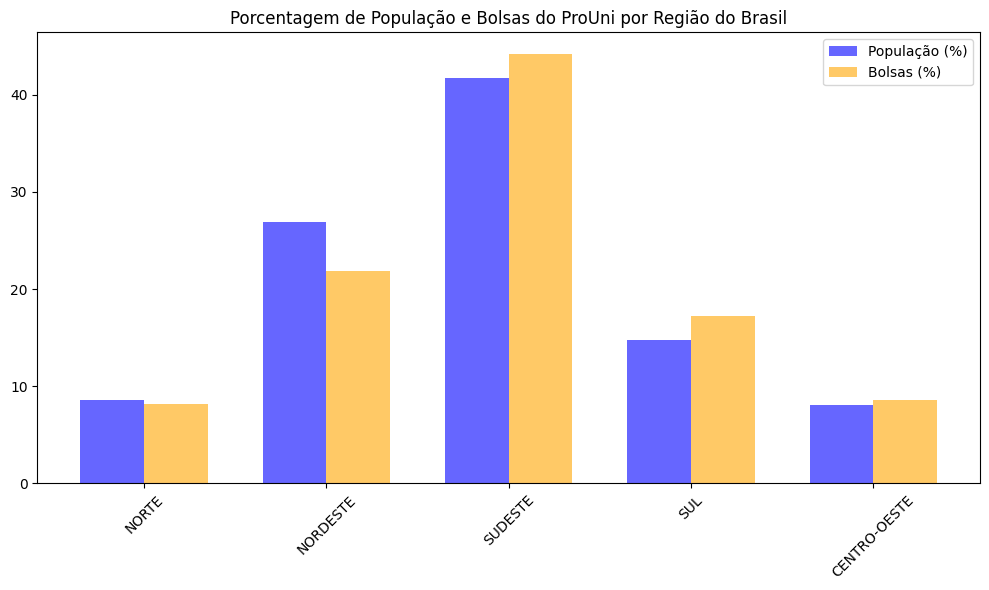

In [26]:
# Combinar os DataFrames para geração do gráfico de barras 
df_combinado = pd.merge(df_pop[['Região', 'pop_%']], df_bolsas_regiao[['Região','bolsas_%']], on='Região', how='inner')
df_combinado = pd.DataFrame(df_combinado)


# Definindo a largura de cada barra no gráfico
bar_width = 0.35

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))

# Criando as barras para pop_%
plt.bar(np.arange(len(df_combinado['Região'])), df_combinado['pop_%'], width=bar_width, label='População (%)', color='blue', alpha=0.6)

# Criando as barras para bolsas_%
plt.bar(np.arange(len(df_combinado['Região'])) + bar_width, df_combinado['bolsas_%'], width=bar_width, label='Bolsas (%)', color='orange', alpha=0.6)

# Adicionando título e rótulos
plt.title('Porcentagem de População e Bolsas do ProUni por Região do Brasil')
plt.xticks(np.arange(len(df_combinado['Região'])) + bar_width / 2, df_combinado['Região'], rotation=45)  # Ajustando os rótulos do eixo x
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

#### Resultado

Podemos verificar que a distribuição de bolsas segue a relação da população brasileira por região. As regiões com maior população são aquelas que apresentam mais bolsas concedidas pelo programa <br>

Porém, é importante destacar que nas regiões mais pobre do país, sobre tudo o Nordeste, em que a diferença é mais visível, a porcentagem da população do pais é significamente maior que a porcentagem de bolsas distribuidas.<br>
Por outro lado, regiões como a sul e sudeste, a porcentagem de bolsas obtidas é maior que a porcentagem da população brasileira. <br>

Tendo em vista que o ProUni se coloca como um programa de democratização da educação, as regiões mais pobre do país deveriam apresentar uma porcentagem mais significativa das bolsas recebidas.

#### 4.2 Análise Por Raça

Partindo do mesmo princípio da análise 4.1, iremos verificar se existe uma relação entre a distribuição de bolsas pelo ProUni para as cor ou raça. <br>

Ainda que esses dados sejam uma auto declaração, é importante que se tenha uma análise para entender o acessoa a educação através das políticas públicas do Brasil. <br>

Como dados comparitvos, iremos também utilizar os dados do censo do IBGE, porém dessa vez os dados se encontram em uma reportagem do Orgão Governamental que pode ser acessado [aqui](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html)

In [27]:
#Dados do Censo 2022 de população por raça no pais
dados = {
    'Raça': ['PARDA', 'BRANCA', 'PRETA', 'INDIGENA', 'AMARELA'],
    'População': [45.3, 43.5, 10.2, 0.6, 0.4]
}
df_cor = pd.DataFrame(dados)
df_cor

,Raça,População
0,PARDA,45.3
1,BRANCA,43.5
2,PRETA,10.2
3,INDIGENA,0.6
4,AMARELA,0.4


In [30]:
# Criando um df que contenha a relação entre Cor/Raca e número de Bolsas
bolsas_cor = df['RACA'].value_counts().reset_index()

# Renomeando as colunas para ficar mais claro
bolsas_cor.columns = ['Raça', 'Bolsas']
df_bolsas_cor = pd.DataFrame(bolsas_cor)


In [31]:
# para uma melhor classificação, iremos excluir os valores marcados como não informada

df_bolsas_cor = df_bolsas_cor.query("Raça != 'NAO INFORMADA'")

#criando a coluna de bolsas_% que apresenta a % de bolsas concedidas por cada genero
total_bolsa = df_bolsas_cor['Bolsas'].sum()
df_bolsas_cor['bolsas_%'] = (df_bolsas_cor['Bolsas'] / total_bolsa) * 100
df_bolsas_cor['bolsas_%'] = df_bolsas_cor['bolsas_%'].round(2)
df_bolsas_cor


,Raça,Bolsas,bolsas_%
0,PARDA,403135,46.34
1,BRANCA,338585,38.92
2,PRETA,112589,12.94
3,AMARELA,14886,1.71
4,INDIGENA,745,0.09


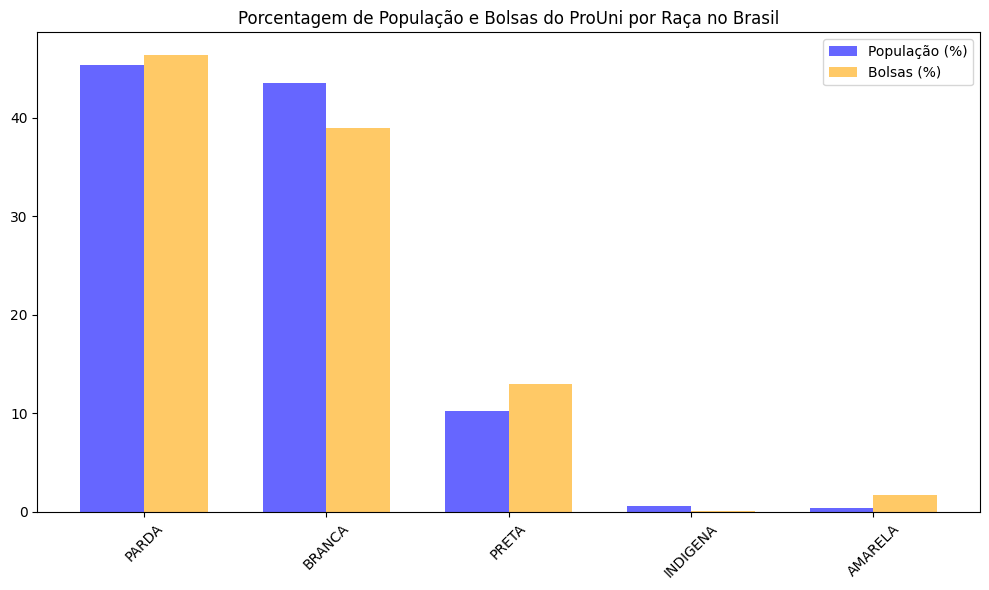

In [32]:
# Combinar os DataFrames para geração do gráfico de barras 
df_unico = pd.merge(df_cor[['Raça', 'População']], df_bolsas_cor[['Raça','bolsas_%']], on='Raça', how='inner')
df_unico = pd.DataFrame(df_unico)
df_unico

# Definindo a largura de cada barra no gráfico
bar_width = 0.35

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))

# Criando as barras para População
plt.bar(np.arange(len(df_unico['Raça'])), df_unico['População'], width=bar_width, label='População (%)', color='blue', alpha=0.6)

# Criando as barras para bolsas_%
plt.bar(np.arange(len(df_unico['Raça'])) + bar_width, df_unico['bolsas_%'], width=bar_width, label='Bolsas (%)', color='orange', alpha=0.6)

# Adicionando título e rótulos
plt.title('Porcentagem de População e Bolsas do ProUni por Raça no Brasil')
plt.xticks(np.arange(len(df_unico['Raça'])) + bar_width / 2, df_unico['Raça'], rotation=45)  # Ajustando os rótulos do eixo x
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

#### Resultado

Em relação a Raça/Cor podemos observar uma grande democratização e inclusão nas bolsas distribuidas pelo ProUni. <br>

Observa-se que populações Pretas e Pardas apresentam uma porcentagem maior de bolsas recebidas comparada com a porcentagem de brasileiros que autodeclarão pertecentes a essa cor. <br>
Isso é fundamental para que essas populações tenham acesso a diplomas de graduação.<br>

Observa-se ainda que a população Branca recebe uma porcetagem de bolsas menor que a porcetagem da população autodenominada pertecente a essa cor.<br>
Isso pode monstrar uma preocupação governamental para com as outras raças tratadas como minoria no país. Uma medida de inclusão das outras raças para um ambiente muitas vezes negados a eles. 


Um ponto de atenção a se destacar é a participação da comunidade indígena no ProUni. A sua participação é muito baixa, mesmo levando em consideração que menos de 1% dos brasileiros são indígenas.

#### 4.3 Análise Por Gênero

Nesta etapas analisaremos a relação entre gêneros nas bolsas distribuidas pelo ProUni. <br>
Os dados presentes sobre gênero, retirados po Censo Demográfico 2022, podem ser conferidos no [site do IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18320-quantidade-de-homens-e-mulheres.html)

In [183]:
#Dados do Censo 2022 de população por gênero
dados = {
    'Gênero': ['MASCULINO', 'FEMININO'],
    'Porcentagem': [48.5, 51.5]
}
df_genero = pd.DataFrame(dados)
df_genero

,Gênero,Porcentagem
0,MASCULINO,48.5
1,FEMININO,51.5


In [184]:
# Criando um df que contenha a relação entre genero e número de Bolsas
bolsas_genero = df['SEXO'].value_counts().reset_index()

# Renomeando as colunas para ficar mais claro
bolsas_genero.columns = ['Gênero', 'Bolsas']

#criando a coluna de bolsas_% que apresenta a % de bolsas concedidas por cada genero
total_bolsa = bolsas_genero['Bolsas'].sum()
bolsas_genero['bolsas_%'] = (bolsas_genero['Bolsas'] / total_bolsa) * 100
bolsas_genero['bolsas_%'] = bolsas_genero['bolsas_%'].round(2)
df_bolsas_genero = pd.DataFrame(bolsas_genero)
df_bolsas_genero


,Gênero,Bolsas,bolsas_%
0,FEMININO,497510,57.18
1,MASCULINO,372543,42.82


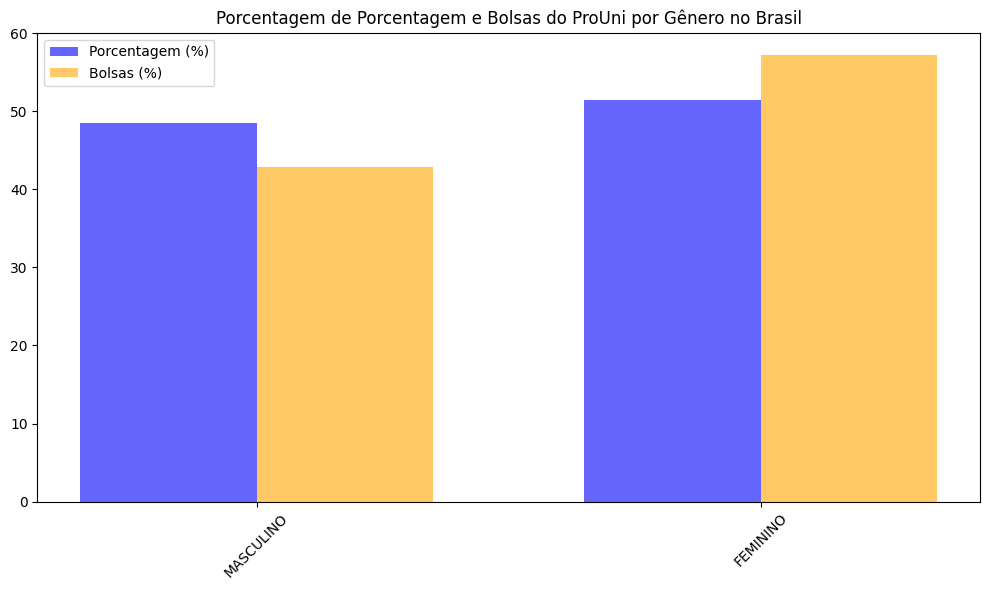

In [187]:
# Combinar os DataFrames para geração do gráfico de barras 
df_genero_geral = pd.merge(df_genero[['Gênero', 'Porcentagem']], df_bolsas_genero[['Gênero','bolsas_%']], on='Gênero', how='inner')
df_genero_geral = pd.DataFrame(df_genero_geral)
df_genero_geral

# Definindo a largura de cada barra no gráfico
bar_width = 0.35

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))

# Criando as barras para Porcentagem
plt.bar(np.arange(len(df_genero_geral['Gênero'])), df_genero_geral['Porcentagem'], width=bar_width, label='Porcentagem (%)', color='blue', alpha=0.6)

# Criando as barras para bolsas_%
plt.bar(np.arange(len(df_genero_geral['Gênero'])) + bar_width, df_genero_geral['bolsas_%'], width=bar_width, label='Bolsas (%)', color='orange', alpha=0.6)

# Adicionando título e rótulos
plt.title('Porcentagem de População e Bolsas do ProUni por Gênero no Brasil')
plt.xticks(np.arange(len(df_genero_geral['Gênero'])) + bar_width / 2, df_genero_geral['Gênero'], rotation=45)  # Ajustando os rótulos do eixo x
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

#### Resultado

Nesses dados observa-se que o ProUni também busca a democratização da educação. Uma vez que as bolsas distribuidas por gênero seguem a porcetagem da população brasileira <br>

Ainda se observa uma maior distribuição de bolsas para o gênero feminino. O que demonstra uma busca maior das mulheres por um diploma de graduação, algo que há alguns anos poucas mulheres o possuia. <br>

Antes vistas apenas com a função de donas de casa, as mulheres estão buscando cada vez mais educação. 

#### 4.4 Análise do Número de Bolsas

Nesta última etapa iremos analisar o número de bolsas ofertadas pelo ProUni ao longo dos 4 anos analisados. 

In [ ]:
# Criando um df que contenha a relação entre genero e número de Bolsas
bolsas_ano = df['ANO_CONCESSAO_BOLSA'].value_counts().reset_index().sort_values(by="ANO_CONCESSAO_BOLSA")

# Renomeando as colunas para ficar mais claro
bolsas_ano.columns = ['Ano', 'Bolsas']
df_bolsas_ano = pd.DataFrame(bolsas_ano)
df_bolsas_ano

,Ano,Bolsas
1,2017,236636
0,2018,241032
2,2019,225555
3,2020,166830


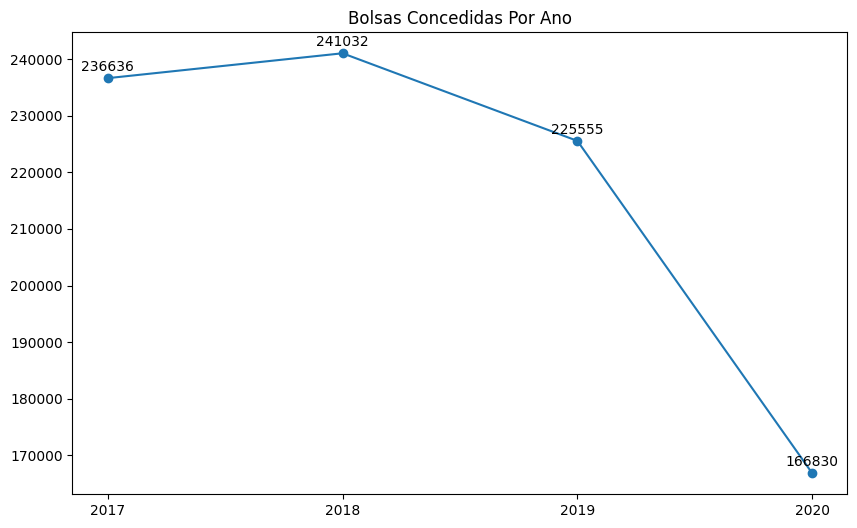

In [204]:
plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura

# Plotando os dados com o marcador 'o'
plt.plot(df_bolsas_ano['Ano'], df_bolsas_ano['Bolsas'], marker='o', linestyle='-')

# Adicionando marcadores e valores
for x, y in zip(df_bolsas_ano['Ano'], df_bolsas_ano['Bolsas']):
    plt.annotate(str(y), xy=(x, y), textcoords='offset points', xytext=(0, 5), ha='center')

# Personalizando o gráfico
plt.title('Bolsas Concedidas Por Ano')
plt.grid(False)
plt.xticks([2017, 2018, 2019, 2020])

plt.show()

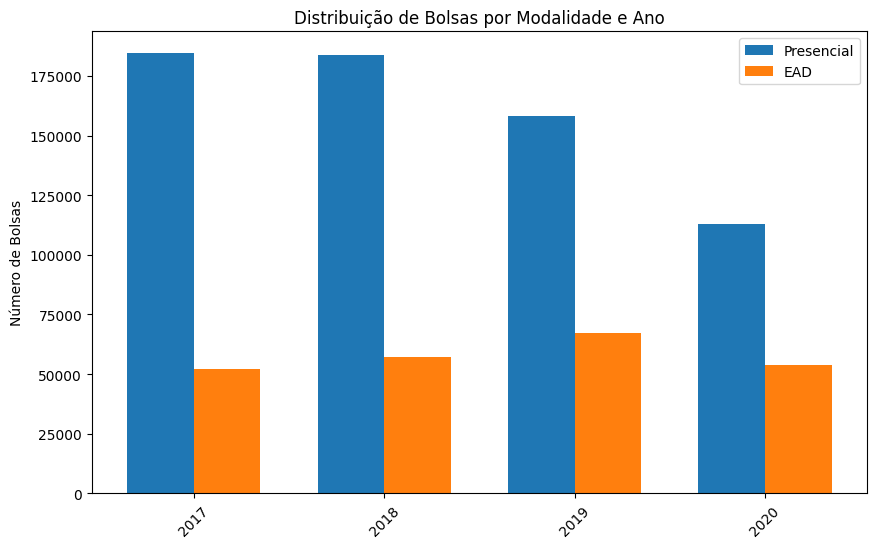

In [210]:
# Gráfico para analisar a quantidade de bolsas distribuidas em cada ano por tipo de Bolsa 
df_grouped = df.groupby(['ANO_CONCESSAO_BOLSA', 'MODALIDADE_ENSINO_BOLSA']).size().reset_index(name='Contagem')

# Criar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

# Definir a largura das barras e o espaço entre os grupos
bar_width = 0.35
index = df_grouped['ANO_CONCESSAO_BOLSA'].unique()

# Criar as barras para cada modalidade
plt.bar(index - bar_width/2, df_grouped[df_grouped['MODALIDADE_ENSINO_BOLSA'] == 'PRESENCIAL']['Contagem'], bar_width, label='Presencial')
plt.bar(index + bar_width/2, df_grouped[df_grouped['MODALIDADE_ENSINO_BOLSA'] == 'EAD']['Contagem'], bar_width, label='EAD')

# Personalizar o gráfico
plt.ylabel('Número de Bolsas')
plt.title('Distribuição de Bolsas por Modalidade e Ano')
plt.xticks(index, rotation=45)  # Rotacionar os rótulos do eixo x
plt.legend()

# Mostrar o gráfico
plt.show()

#### Resultado

Aqui já podemos enxergar um grande problema no ProUni <br>

Nos últimos dois anos em Análise, podemos verificar que houve uma grande diminuição nas bolsas distribuidas pelo programa <br>
Essa diminuição chega a quase 30% se compararmos 2017 com 2020.<br>

Levando em conta que no ano de 2020 passamo por uma pandemia, é plausível que a diminuição das bolsas presenciais tenham caído por esse motivo. <br>
Porém, levando em conta o mesmo pensamento, presupõe-se um aumento nas bolsas EAD. Porém os dados demonstram o contrário. 


## 5. Conclusão

Através da análise dos dados podemos confirmar que o ProUni busca levar sim uma educação a todas as regiões do país e também a todos os tipos de pessoas <br>
O projeto apresenta uma grande oportunidade para que vários brasileiros possam conseguir os seu primeiro diploma <br>
<br><br>
##### Pontos Positivos
O ProUni atende de maneira significativa populações que apresentam uma discriminalização social <br>
Em relação a raça/cor mais de 50% dos alunos atendidos com bolsa são pardos ou negros. <br>
O mesmo ocorre com mulheres, que são a maioria dos bolsista do programa quando analisamos o gênero <br>
De forma indireta, ter esses alunos a oportunidade de acesso ao ensino superior pode mudar a realidade deles e de muitos outros ao seu redor. 
<br><br>
##### Pontos Negativos
Em relação a distribuição geográfica das bolsas, o ProUni se concentra mais em regiões desenvolvidas como o sul e o sudeste, quando comparamos a distribuição da população brasileira.<br>
Para democratizar a educação é necessários que regiões como o Norte e Nordeste tenham um crescimento do número de bolsas concedidas. Para que, assim, o ProUni traga mais oportunidades para essa Região

<center><strong><h3>Ponto Gravissímo</h3></strong></center>
O número de bolsas do ProUni, entre os anos analisados diminuiu drasticamente<br>
Talvez o ProUni não seja o Programa Universidade Para Todos não por atender de maneira privilegiadas grupos predominantes da sociedade, <br>
mas sim porque está cada vez mais diminuindo a sua abrangência. 


